# Neighborhood Analysis
# Team Mates:Akash Reddy Gurram(HR69338),Vineeth Reddy Anugu(FD78097)
## Project NoteBook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
import re
import numpy as np


# These are the datasets. We named them as taxes, sust and crime 

In [2]:
taxes = pd.read_csv("D:\Fall 2018\DataScience\Project\Real_Property_Taxes.csv")
sust = pd.read_csv("D:\Fall 2018\DataScience\Project\Sustainability__2010-2013_.csv") 
crime = pd.read_csv("D:\Fall 2018\DataScience\Project\Crime_and_Safety__2015__data.csv")

# Sustainability Data set

In [3]:
sust.head(10)

,Neighborhood,regvote10,regvote12,voted10,voted12,dirtyst10,dirtyst11,dirtyst12,dirtyst13,clogged10,...,heatgas13,elheat13,novhcl13,weather10,weather11,weather12,weather13,wlksc11,bkln12,othrcom13
0,Allendale/Irvington/S. Hilton,83.4,82.8,45.3,57.0,41.7,41.0,48.1,37.0,4.2,...,66.0,22.0,28.8,0.5,0.4,0.4,0.4,44.0,2.4,1.5
1,Beechfield/Ten Hills/West Hills,79.7,81.6,52.6,61.9,10.5,12.2,13.9,10.2,3.4,...,76.0,15.2,18.8,0.5,0.3,0.4,0.3,32.5,4.2,0.6
2,Belair-Edison,81.7,83.2,46.6,59.8,90.2,66.3,79.1,65.9,4.1,...,69.9,15.2,27.7,0.6,0.3,0.6,0.6,62.3,0.2,1.1
3,Brooklyn/Curtis Bay/Hawkins Point,53.6,53.3,30.1,28.3,91.5,112.1,82.8,66.0,4.2,...,68.2,27.4,33.3,1.4,9.1,0.9,0.4,17.7,3.2,3.6
4,Canton,79.5,71.5,43.2,52.0,32.8,38.5,38.3,43.7,6.3,...,64.2,31.3,10.1,0.0,0.0,0.1,0.0,89.2,2.8,3.7
5,Cedonia/Frankford,73.9,78.5,46.6,56.2,22.5,24.2,24.3,17.8,2.5,...,74.0,18.1,27.2,0.4,0.3,0.6,0.7,57.4,2.2,0.7
6,Cherry Hill,82.5,82.3,34.9,53.1,11.7,12.7,7.2,7.2,1.2,...,67.6,27.0,52.5,15.7,74.4,8.1,2.0,38.1,2.8,0.3
7,Chinquapin Park/Belvedere,83.2,85.9,51.2,61.9,26.3,32.1,47.3,25.5,5.0,...,66.1,24.3,24.5,0.4,0.3,0.6,0.5,74.6,0.8,2.9
8,Claremont/Armistead,60.7,60.9,37.8,39.0,8.1,12.6,17.1,16.3,1.6,...,80.9,16.6,27.9,1.0,0.5,0.7,0.3,31.0,1.3,1.7
9,Clifton-Berea,91.5,89.5,40.3,57.5,167.2,171.9,167.7,107.7,10.9,...,66.6,17.6,47.1,0.4,0.4,0.3,0.3,58.3,0.5,3.0


### This is the sustainability dataset for the neighborhoods in Baltimore City area. This contains information about various metrics regarding these neighborhoods like dirty streets, clogged pipes, walkscore, trees. We are dropping the other columns that we think are uncessary for our analysis.

In [4]:
s = sust['Neighborhood'].str.split('/').apply(pd.Series, 1).stack() #Some neighborhoods are combined into one row seperated by /
s.index = s.index.droplevel(-1) # So we are splitting them
s.name = 'Neighborhood'
del sust['Neighborhood']
sust = sust.join(s)
sust=sust.reset_index()
del sust['index']

We are dropping some columns

In [5]:
sust.drop(['regvote10', 'regvote12', 'voted10', 'voted12', 'drvalone13', 'carpool13', 'pubtran13', 'walked13', 'trav14_13', 'trav29_13', 'trav44_13', 'trav45_13', 'waterc11', 'heatgas13',
          'elheat13','weather10','weather11','weather12','weather13', 'bkln12', 'othrcom13', 'novhcl13', 'treeplnt13'],axis=1, inplace=True)

### We are renaming some column names for understanding and convinience


In [6]:
sust.rename(columns={'dirtyst10': "DirtyStreets'10"}, inplace=True)
sust.rename(columns={'dirtyst11': "DirtyStreets'11"}, inplace=True)
sust.rename(columns={'dirtyst12': "DirtyStreets'12"}, inplace=True)
sust.rename(columns={'dirtyst13': "DirtyStreets'13"}, inplace=True)
sust.rename(columns={'clogged10': "CloggedDrains'10"}, inplace=True)
sust.rename(columns={'clogged11': "CloggedDrains'11"}, inplace=True)
sust.rename(columns={'clogged12': "CloggedDrains'12"}, inplace=True)
sust.rename(columns={'clogged13': "CloggedDrains'13"}, inplace=True)
sust.rename(columns={'trees07': 'Trees'}, inplace=True)
sust.rename(columns={'cmos11': 'OpenSpace'}, inplace=True)
sust.rename(columns={'wlksc11': 'WalkScore'}, inplace=True)
            

In [7]:
sust.isnull().values.any()

False

There are no missing values in this data set. Hence it is cleaned now.

# Taxes Dataset

In [8]:
taxes.head(50)

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0001002,0001,002,15,370,2043 W NORTH AVE,14X83-10,1112.76,55.44,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941619, -76.65109034)"
1,5918064,5918,064,26,380,3429 SHANNON DR,18X91-9,2801.01,139.55,PRINCIPAL RESIDENCE,1356.50,09/29/2018,Belair-Edison,Notheastern,13.0,"(39.3229146, -76.56235554)"
2,0001004,0001,004,15,370,2039 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941951, -76.65099026)"
3,0001005,0001,005,15,370,2037 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942111, -76.65094166)"
4,0001006,0001,006,15,370,2035 W NORTH AVE,14X83-10,247.28,12.32,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942277, -76.65089166)"
5,4179P033,4179P,033,26,340,3811 LYNDALE AVE,14X100,2032.19,101.25,NOT A PRINCIPAL RESIDENCE,2123.28,07/01/2018,Belair-Edison,Notheastern,13.0,"(39.31680208, -76.56505749)"
6,0001009,0001,009,15,370,2029 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942756, -76.65074605)"
7,0001010,0001,010,15,370,2027 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942925, -76.65069531)"
8,0001011,0001,011,15,370,2025 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30943089, -76.65064581)"
9,0001012,0001,012,15,370,2023 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30943253, -76.65059631)"


### In this dataset, we see that there are properties and associated with those properties are some columns like LotSize, CityTax, StateTax, Neighborhood, Police and council district it belongs to, Location etc.

### We are dropping the following columns as they do not provide any insights for our analysis

In [9]:
taxes.drop(['PropertyID','Block','Sect', 'Lot', 'Ward', 'AmountDue','AsOfDate' ],axis=1,inplace=True)

Let us check for missing data

In [10]:
taxes.isnull().sum()

PropertyAddress        5
LotSize                0
CityTax            18925
StateTax           18727
ResCode                0
Neighborhood       16075
PoliceDistrict     16075
CouncilDistrict    16047
Location           16035
dtype: int64

### These are the null values in the taxes data frame. We can use some data filling technique to fill the missing data, but one of the columns that has a lot of null values are Location. We cannot fill a location with some arbitary value. So we will drop the rows which has null in its Location. Also when compared to the length of this data set, the null values are small in number. Hence we are dropping them.

In [11]:
taxes = taxes.dropna()
taxes = taxes.reset_index()
del taxes['index']

### There are no null values in this dataset now. So it would not be a problem for future computations.
### We are combining the StateTax and CityTax columns into a single Totaltax column

In [12]:
taxes['TotalTax'] = taxes['StateTax'] + taxes['CityTax']
taxes.drop(['StateTax', 'CityTax'],axis = 1, inplace=True)

### We are splitting the Location column into two, they are Latitude and Longitude

In [13]:
latitude = []
longitude = []
for i in range(len(taxes)):
    x = taxes['Location'][i].split(',')
    latitude.append(float(x[0][1:]))
    longitude.append(float(x[1][1:-1]))
taxes.insert(7,'Latitude', latitude)
taxes.insert(8,'Longitude', longitude)
del taxes['Location']

### The LotSize did not have a consistent format to follow and had a lot of noisy data. So we decided to clean this up and convert it into a square feet format to measure LotSizes. This is appended to the dataset as NewLotSize column

In [14]:
o = []
for i in range(len(taxes)):
    o.append(' '.join(taxes['LotSize'][i].split()))
for i in range(len(o)):
    o[i]=o[i].replace('X',':')
    o[i]=o[i].replace('-','.')
    o[i] = o[i].replace('&','.')
    if 'O' in o[i]:
        o[i] = o[i].replace('O','0')
for i in range(len(o)):
    if 'AC LAND 0NLY' in o[i]:
        o[i]= o[i][-len(o[i]):-12]
    elif 'REAR PART'  in o[i] or 'AC.(LAND)' in o[i]:
        o[i]= o[i][-len(o[i]):-10]
    elif 'ACRES FL'  in o[i] or 'ACRES+/.'  in o[i] or 'REAR PAR'  in o[i]:
        o[i]= o[i][-len(o[i]):-9]
    elif 'ACREAS' in o[i]:
        o[i]= o[i][-len(o[i]):-7]
    elif 'ACREAGE' in o[i]:
        o[i]= o[i][-len(o[i]):-8]
    elif 'SQ FT' in o[i] or 'ARCES' in o[i] or 'ACERS' in o[i] or 'ACRES'  in o[i]:
        o[i]= o[i][-len(o[i]):-6]
    elif 'ACRE'  in o[i] or 'S.F.' in o[i] or 'ACES' in o[i] or 'ARES' in o[i]:
        o[i]= o[i][-len(o[i]):-5]
err=[]
for i in range(len(o)):
    o[i] = o[i].split(':')
    if len(o[i])>2:
        o[i] = 0
    else:
        for j in o[i]:
            #if re.match("/(\d+(\.\d+)?)/", j) is None:
            if re.match("^\d+?\.\d+?$", j) is None  and j.isdigit() is False:
                o[i] = 0
                err.append(i)
                break
for i in range(len(o)):
    if type(o[i])== list and len(o[i]) == 1:
        o[i] = float(o[i][0]) * 43560
        o[i] = str(o[i])
for i in range(len(o)):
    if o[i]!=0:
        if len(o[i]) == 2:
            o[i] = float(o[i][0]) * float(o[i][1])
        else:
            o[i] = float(o[i])
taxes.insert(3,'NewLotSize',o)
for i in err:
    taxes = taxes.drop(taxes.index[i])
taxes = taxes.reset_index()
del taxes['index']
taxes = taxes[taxes.NewLotSize != 0]
taxes = taxes.reset_index()
del taxes['index']
del taxes['LotSize']

### Comparing the data sets using the Total Tax would not be fair because properties with a bigger size obviously tend to have bigger values, we are calculating tax per 100 square feet now that the LotSize is available in the square feet format. Taxper100 is the new column that will be appended to the dataset.

In [15]:
taxper100 = []
for i in range(len(taxes)):
    taxper100.append((taxes['TotalTax'][i] * 100)/taxes['NewLotSize'][i])
taxes['Taxper100']= taxper100

# Crime Dataset

In [16]:
crime.head(50)

,the_geom,OBJECTID,Community Statistical Areas (CSAs),"Part 1 Crime Rate per 1,000 Residents","Violent Crime Rate per 1,000 Residents","Property Crime Rate per 1,000 Residents","Juvenile Arrest Rate per 1,000 Juveniles","Juvenile Arrest Rate for Violent Offenses per 1,000 Juveniles","Juvenile Arrest Rate for Drug Offenses per 1,000 Juveniles","Rate of 911 Calls for Service for Shootings per 1,000 Residents","Rate of Gun Homicides per 10,000 Residents","Rate of 911 Calls for Service for Common Assaults per 1,000 Residents","Rate of 911 Calls for Service for Narcotics per 1,000 Residents","Rate of 911 Calls for Service for Auto Accidents per 1,000 Residents","Adult Arrest Rate per 1,000 Adults",Shape__Area,Shape__Length
0,MULTIPOLYGON (((-76.598249582828 39.3541564623...,20,Greater Govans,48.965453,11.328527,37.262429,17.316017,2.597403,4.329004,3.183223,0.748994,66.473177,81.546672,47.841962,32.581764,2.269850e+07,22982.125715
1,MULTIPOLYGON (((-76.52969396034 39.35653169125...,24,Hamilton,47.531149,9.460083,37.148131,8.666667,0.666667,0.000000,1.461314,0.153822,44.839255,22.458083,46.069835,17.168675,4.519110e+07,27712.111092
2,MULTIPOLYGON (((-76.573052627685 39.3539091042...,37,Northwood,42.300066,10.514931,30.583428,16.818500,4.905396,0.000000,1.021450,0.120171,32.866671,19.527729,53.055339,9.604106,5.274327e+07,38889.894591
3,MULTIPOLYGON (((-76.638802781968 39.3069621725...,43,Sandtown-Winchester/Harlem Park,72.435553,26.114393,44.978518,53.972104,10.309278,14.554275,9.667025,1.208378,116.071429,220.797530,76.194952,72.268452,2.367209e+07,20987.143306
4,MULTIPOLYGON (((-76.677916539956 39.3400168652...,13,Dorchester/Ashburton,50.313932,12.557271,36.738503,10.933558,2.523129,2.523129,2.630239,0.593925,55.913796,23.502461,50.229085,13.747564,3.411828e+07,27136.075712
5,MULTIPOLYGON (((-76.682968511607 39.3413341519...,27,Howard Park/West Arlington,48.468684,10.944542,37.064288,13.011152,3.717472,1.858736,1.655477,0.459855,42.214660,26.119746,79.095006,11.133016,6.326243e+07,36034.498543
6,MULTIPOLYGON (((-76.584490179362 39.3149148861...,10,Clifton-Berea,66.538384,23.698602,41.219364,29.668412,1.745201,6.980803,6.380393,0.810209,101.276079,140.976301,79.096617,81.566069,2.328523e+07,24022.764621
7,MULTIPOLYGON (((-76.569411446105 39.2924907712...,39,Patterson Park North & East,93.064815,18.764176,72.719775,56.903766,25.104603,2.510460,1.443398,0.206200,66.327583,34.366623,52.924600,29.344175,1.450764e+07,21786.374660
8,MULTIPOLYGON (((-76.609887581086 39.3555008577...,36,North Baltimore/Guilford/Homeland,38.250115,4.466331,33.612002,11.022044,3.006012,1.002004,0.171782,0.000000,18.208887,11.108566,32.638571,8.619529,7.492399e+07,42904.222144
9,MULTIPOLYGON (((-76.625886149546 39.2671883622...,44,South Baltimore,41.835779,3.278177,38.089291,16.129032,5.376344,0.000000,0.156104,0.000000,28.098658,14.205432,60.099906,10.123931,4.635394e+07,68440.028069


### This is the crime and safety dataset. It show crime rates, the number of 911 calls for different crimes like assault, shooting, narcotics, arrest rates etc. Most of this information is per 1000 residents
### The Community Statistical Areas column is the Neighborhood Column with a different name.

### Are there any missing values in this dataset ?

In [17]:
crime.isnull().values.any()

False

### This dataset was actually a map in the open baltimore dataset. We converted it to a csv file. So it has some columns like the-geom, Shape__Length, Shape__Area. So we are dropping those columns. Also, the column names are really big, so we replaced them with short names for convinience

In [18]:
crime.drop(['the_geom', 'OBJECTID', 'Shape__Area', 'Shape__Length'],axis=1, inplace=True)

In [19]:
crime.rename(columns={'Part 1 Crime Rate per 1,000 Residents': 'CrimeRate'}, inplace=True)
crime.rename(columns={'Violent Crime Rate per 1,000 Residents': 'ViolentCrimeRate'}, inplace=True)
crime.rename(columns={'Property Crime Rate per 1,000 Residents': 'PropertyCrimeRate'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate per 1,000 Juveniles': 'JuvenileArrestRate'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate for Violent Offenses per 1,000 Juveniles': 'JuvenileViolentOffenses'}, inplace=True)
crime.rename(columns={'Juvenile Arrest Rate for Drug Offenses per 1,000 Juveniles': 'JuvenileDrugOffenses'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Shootings per 1,000 Residents': '911Shootings'}, inplace=True)
crime.rename(columns={'Rate of Gun Homicides per 10,000 Residents': 'GunHomicides'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Common Assaults per 1,000 Residents': '911CommonAssaults'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Narcotics per 1,000 Residents': '911Narcotics'}, inplace=True)
crime.rename(columns={'Rate of 911 Calls for Service for Auto Accidents per 1,000 Residents': '911AutoAccidents'}, inplace=True)
crime.rename(columns={'Adult Arrest Rate per 1,000 Adults': 'AdultArrestRate'}, inplace=True)

In [20]:
c = crime['Community Statistical Areas (CSAs)'].str.split('/').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)
c.name = 'Neighborhood'
del crime['Community Statistical Areas (CSAs)']
crime = crime.join(c)
crime=crime.reset_index()
del crime['index']


## Merging datasets

In [21]:
final = pd.merge(taxes, sust, on = 'Neighborhood')

In [22]:
final = pd.merge(final, crime, on = 'Neighborhood')

In [23]:
final.head(10)

,PropertyAddress,ResCode,NewLotSize,Neighborhood,PoliceDistrict,CouncilDistrict,Latitude,Longitude,TotalTax,Taxper100,...,PropertyCrimeRate,JuvenileArrestRate,JuvenileViolentOffenses,JuvenileDrugOffenses,911Shootings,GunHomicides,911CommonAssaults,911Narcotics,911AutoAccidents,AdultArrestRate
0,3429 SHANNON DR,PRINCIPAL RESIDENCE,1654.2,Belair-Edison,Notheastern,13.0,39.322915,-76.562356,2940.56,177.763269,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
1,3811 LYNDALE AVE,NOT A PRINCIPAL RESIDENCE,1400.0,Belair-Edison,Notheastern,13.0,39.316802,-76.565057,2133.44,152.388571,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
2,3305 RAMONA AVE,PRINCIPAL RESIDENCE,1566.0,Belair-Edison,Notheastern,13.0,39.323463,-76.564369,2423.72,154.771392,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
3,3307 RAMONA AVE,PRINCIPAL RESIDENCE,1566.0,Belair-Edison,Notheastern,13.0,39.323428,-76.564324,2475.64,158.086845,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
4,3311 RAMONA AVE,PRINCIPAL RESIDENCE,1566.0,Belair-Edison,Notheastern,13.0,39.323364,-76.564234,2423.72,154.771392,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
5,3823 LYNDALE AVE,NOT A PRINCIPAL RESIDENCE,1400.0,Belair-Edison,Notheastern,13.0,39.316841,-76.564766,2145.24,153.231429,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
6,3313 RAMONA AVE,NOT A PRINCIPAL RESIDENCE,1566.0,Belair-Edison,Notheastern,13.0,39.323331,-76.564189,2437.88,155.675607,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
7,3317 RAMONA AVE,PRINCIPAL RESIDENCE,1566.0,Belair-Edison,Notheastern,13.0,39.323267,-76.564102,2468.56,157.634738,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
8,3829 LYNDALE AVE,NOT A PRINCIPAL RESIDENCE,1400.0,Belair-Edison,Notheastern,13.0,39.316859,-76.564619,2133.44,152.388571,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866
9,3329 RAMONA AVE,PRINCIPAL RESIDENCE,1566.0,Belair-Edison,Notheastern,13.0,39.323069,-76.563836,2456.76,156.881226,...,39.389068,24.112231,9.206488,0.876808,2.009646,0.516766,65.227377,24.919614,60.231971,20.798866


## Find the unique neighborhood in each data set. 

In [24]:
len(final['Neighborhood'].unique())

61

### The final dataset has 61 unique neighborhoods. This value is obtained by merging the datasets. Only the common neighborhoods in all the 3 datasets are present in the final dataset.

In [25]:
final.columns

Index(['PropertyAddress', 'ResCode', 'NewLotSize', 'Neighborhood',
       'PoliceDistrict', 'CouncilDistrict', 'Latitude', 'Longitude',
       'TotalTax', 'Taxper100', 'DirtyStreets'10', 'DirtyStreets'11',
       'DirtyStreets'12', 'DirtyStreets'13', 'CloggedDrains'10',
       'CloggedDrains'11', 'CloggedDrains'12', 'CloggedDrains'13', 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate'],
      dtype='object')

# Results

### Which CouncilDistrict has the highest average tax per 100 square feet ??
### The reason we are choosing CouncilDistrict over Neighborhoods is that there are 61 unique Neighborhoods and only 14 unique council disticts. Plotting the neighborhoods would not give a clear idea about a specific neighborhood.

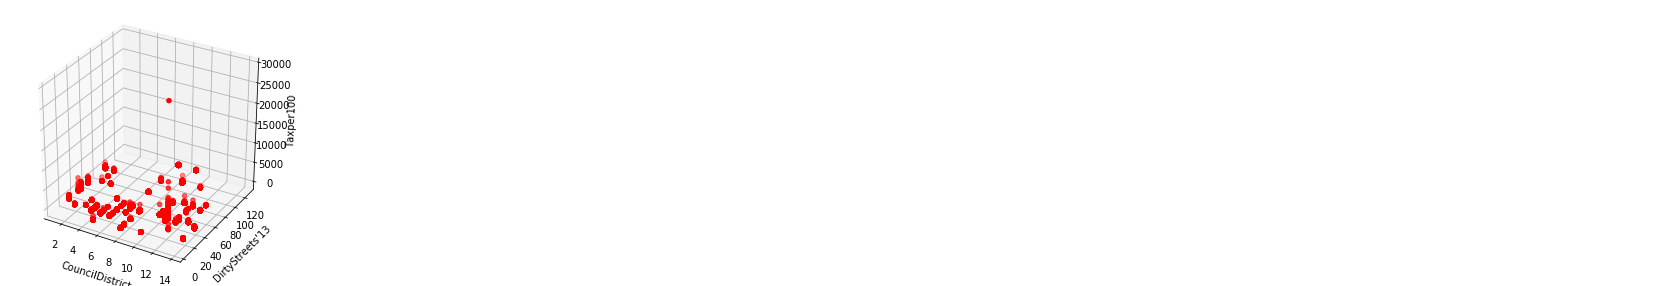

In [26]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection ='3d')
X_axis=final['CouncilDistrict']
Y_axis= final["DirtyStreets'13"]
Z_axis= final['Taxper100']
ax.scatter(X_axis,Y_axis,Z_axis,c='r', marker = 'o')
ax.set_xlabel('CouncilDistrict')
ax.set_ylabel("DirtyStreets'13")
ax.set_zlabel('Taxper100')
plt.show()

### We can see that all the taxes in the council districts are in the range of less than 2500. However, there is one outlier which can be easily seen in the plot. 

### Let's take a look at how PoliceDistricts, CouncilDistricts and Neighborhoods compare in terms of these metrics from the sustainability, crime & safety datasets using heat maps

### In order to plot these heatmaps, we normalized the data of these attributed to a range of 0 to 100 using the MinMaxScaler provided in the sklearn package. This helps us avoid irregular data and improves interpretability to the plot. 

## PoliceDistrict Crime HeatMap

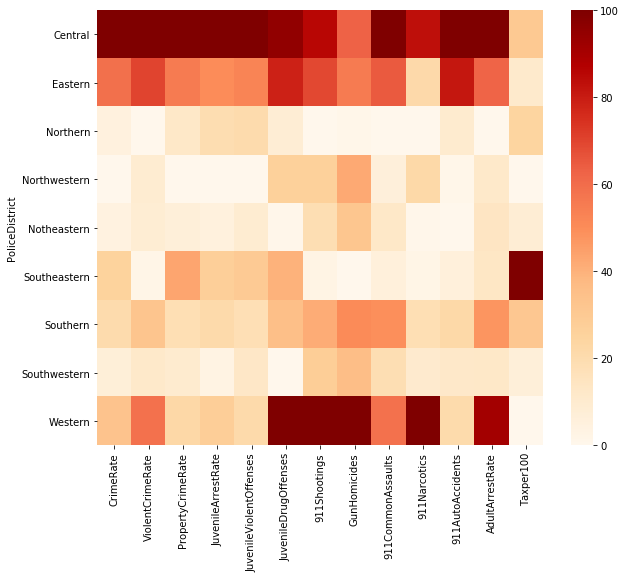

In [27]:
police_heatmap = final[['PoliceDistrict', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate','Taxper100']]
police_heatmap = police_heatmap.groupby('PoliceDistrict').mean()
police_heatmap_cpy = police_heatmap.copy()
col_names2 = ['CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate','Taxper100']
features2 = police_heatmap[col_names2]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
police_heatmap_cpy[col_names2]= features2
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(police_heatmap_cpy, cmap='OrRd', linewidths=0,ax=ax)
plt.show()

### The above heatmap shows crime hotspots like the central police district and also the most crime free zones providing decent tax per 100 ft in police districts like southwestern, northern or northwestern.

## Sustanability Metrics HeatMap over CouncilDistricts

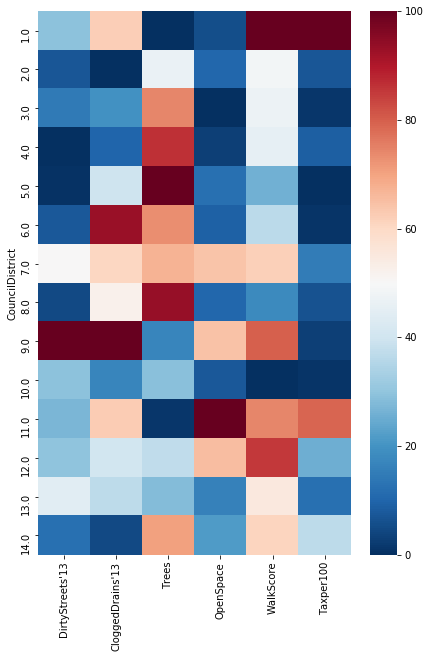

In [28]:
positive_heatmap = final[['Neighborhood', 'CouncilDistrict', 'PoliceDistrict',"DirtyStreets'13","CloggedDrains'13",
       'Trees','OpenSpace', 'WalkScore','Taxper100' ]]
positive_heatmap = positive_heatmap.groupby('CouncilDistrict').mean()
positive_heatmap_cpy = positive_heatmap.copy()
col_names2 = [ "DirtyStreets'13","CloggedDrains'13",
       'Trees','OpenSpace', 'WalkScore','Taxper100']
features2 = positive_heatmap[col_names2]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
positive_heatmap_cpy[col_names2]= features2
fig, ax = plt.subplots(figsize=(7,10)) 
sns.heatmap(positive_heatmap_cpy, cmap='RdBu_r', linewidths=0,ax=ax)
plt.show()


### From the above heat map, we can notice well managed council districts such as council district 1 and 12 and poorly managed council districts such as 10

## Neighborhood HeatMap of all metrics from Sustainability and Crime & safety

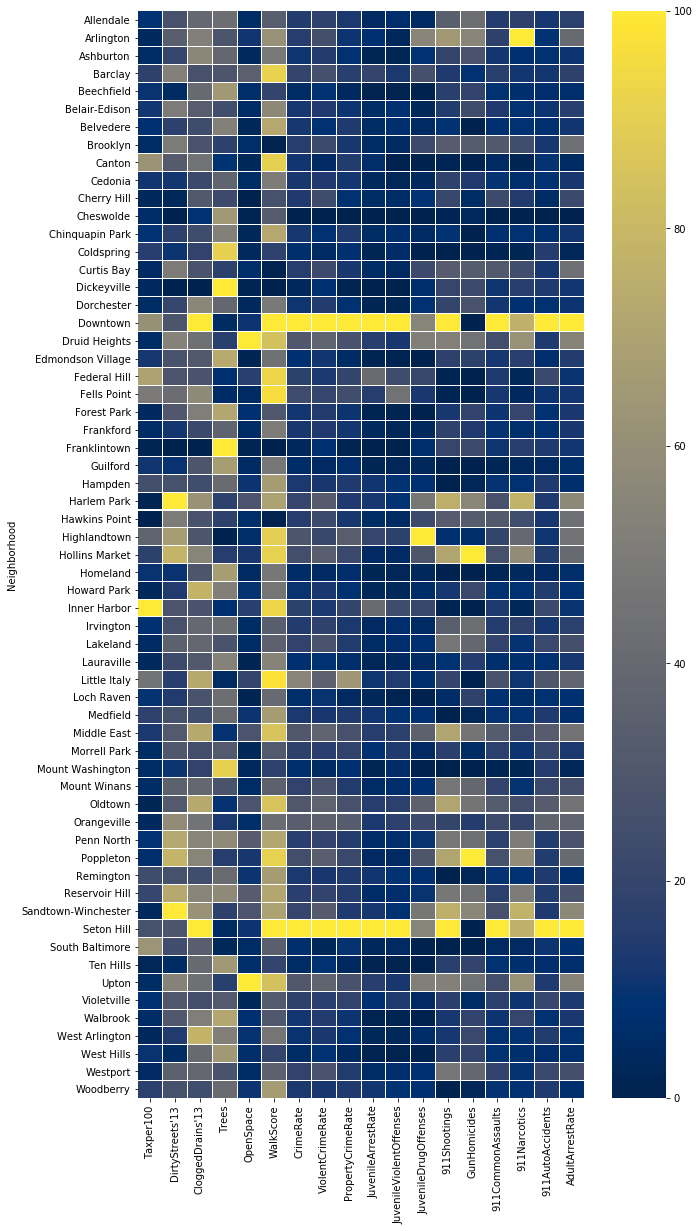

In [29]:
neighbor_heatmap = final[['Neighborhood','Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']]
neighbor_heatmap = neighbor_heatmap.groupby('Neighborhood').mean()
neighbor_heatmap_cpy = neighbor_heatmap.copy()
col_names2 = ['Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']
features2 = neighbor_heatmap[col_names2]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
neighbor_heatmap_cpy[col_names2]= features2
fig, ax = plt.subplots(figsize=(10,20)) 
sns.heatmap(neighbor_heatmap_cpy, cmap='cividis', linewidths=0.05,ax=ax)
plt.show()

### This might show a good visual representation of differences in neighborhoods. But, we wanted to get a more concrete indicator that distinguishes these neighborhoods. 

### Thus, we created a Quality of Life metric for all the council districts and neighborhoods that we have, so that we can compare them and rank them based on it. The Quality of life metric has been calculated based on the metrics available in sustainability, crime & safety to determine which areas would be ideal to live in or make a property invesment in. 

Text(0, 0.5, 'Quality Of Life')

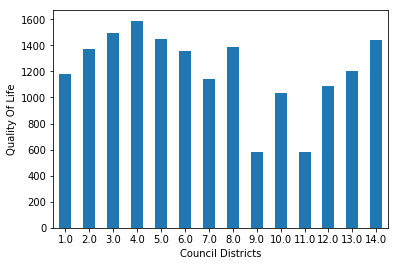

In [30]:
negative_attributes = ['Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']
positive_attributes = [ 'Trees','OpenSpace', 'WalkScore']
Qual = final[['CouncilDistrict','Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']]
Qual = Qual.groupby('CouncilDistrict').mean()
Qual_cpy = Qual.copy()
col_names2 = ['Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']
features2 = Qual[col_names2]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
Qual_cpy[col_names2]= features2
Qual_cpy
QoL = [1500] * 14
for j in range(1,len(QoL)+1):
    for i in range(len(negative_attributes)):
        QoL[j-1] = QoL[j-1] - Qual_cpy[negative_attributes[i]][j]
for j in range(1,len(QoL)+1):
    for i in range(len(positive_attributes)):
        QoL[j-1] = QoL[j-1] + Qual_cpy[positive_attributes[i]][j]
Qual_cpy['QualityOfLife'] = QoL
Qual_plot = Qual_cpy.reset_index()
fig1 = Qual_plot.plot.bar(x='CouncilDistrict', y='QualityOfLife', rot=0, legend=False, cmap='tab10')
fig1.set_xlabel("Council Districts")
fig1.set_ylabel("Quality Of Life")

In [31]:
Qual_cpy=Qual_cpy.reset_index()

## Ranking Council Districts based on Quality of Life %

In [32]:
rank_df = Qual_cpy[['CouncilDistrict','QualityOfLife']]
QoL_percent = Qual_cpy[['CouncilDistrict', 'QualityOfLife']]
QoL_percent = QoL_percent.groupby('CouncilDistrict').mean()
features2 = QoL_percent[['QualityOfLife']]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
QoL_percent['QualityOfLife'] = features2
rank_df['QoL %'] = QoL_percent['QualityOfLife'].tolist()
rank_df = rank_df.sort_values('QualityOfLife', ascending=False)
rank_df.index = range(1,15)
rank_df

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,CouncilDistrict,QualityOfLife,QoL %
1,4.0,1588.846724,100.000000
2,3.0,1491.669931,90.349600
3,5.0,1448.895243,86.101746
4,14.0,1444.298676,85.645272
5,8.0,1388.517017,80.105726
6,2.0,1373.252538,78.589847
7,6.0,1358.412793,77.116146
8,13.0,1204.694724,61.850765
9,1.0,1179.832845,59.381790
10,7.0,1139.876160,55.413785


## Calcualting Quality of Life of Neighborhoods

Text(0, 0.5, 'Quality Of Life')

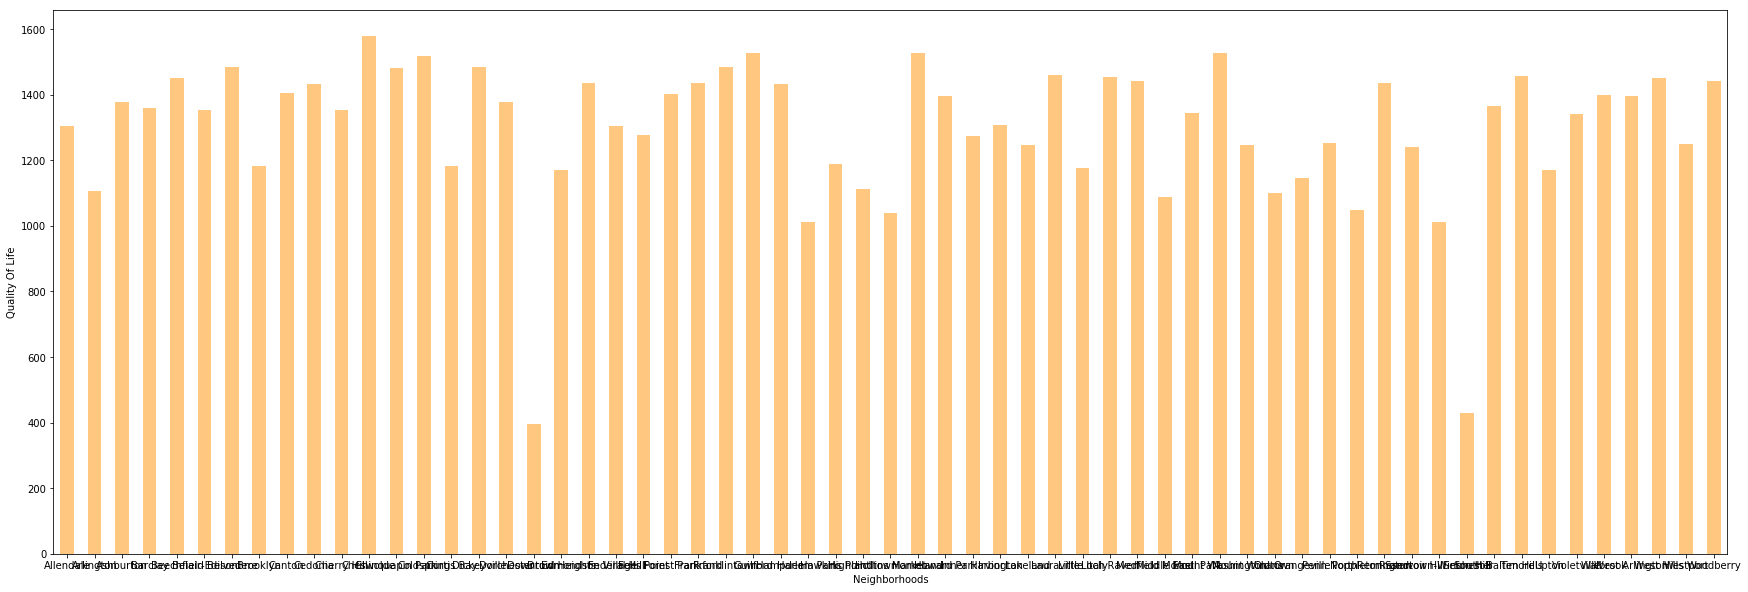

In [33]:
Qual_neighbor = final[['Neighborhood','Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']]
Qual_neighbor = Qual_neighbor.groupby('Neighborhood').mean()
Qual_neighbor_cpy = Qual_neighbor.copy()
col_names2 = [ 'Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']
features2 = Qual_neighbor[col_names2]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
Qual_neighbor_cpy[col_names2]= features2
Qual_neighbor_cpy
QoL_neighbor = [1500] * 61
Qual_neighbor_cpy = Qual_neighbor_cpy.reset_index()
for j in range(len(QoL_neighbor)):
    for i in range(len(negative_attributes)):
        QoL_neighbor[j] = QoL_neighbor[j] - Qual_neighbor_cpy[negative_attributes[i]][j]
for j in range(len(QoL_neighbor)):
    for i in range(len(positive_attributes)):
        QoL_neighbor[j] = QoL_neighbor[j] + Qual_neighbor_cpy[positive_attributes[i]][j]
Qual_neighbor_cpy['QualityOfLife'] = QoL_neighbor
Qua_neighbor_cpy = Qual_neighbor_cpy.reset_index()
fig1 = Qual_neighbor_cpy.plot.bar(x='Neighborhood', y='QualityOfLife', rot=0, legend=False, cmap='copper_r',figsize=(30,10))
fig1.set_xlabel("Neighborhoods")
fig1.set_ylabel("Quality Of Life")

## Ranking Neighborhoods based on Quality Of Life %

In [34]:
rank_df1 = Qual_neighbor_cpy[['Neighborhood', 'QualityOfLife']]
QoL_percent_neighbor = Qual_neighbor_cpy[['Neighborhood', 'QualityOfLife']]
QoL_percent_neighbor = QoL_percent_neighbor.groupby('Neighborhood').mean()
features2 = QoL_percent_neighbor[['QualityOfLife']]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
QoL_percent_neighbor['QualityOfLife'] = features2
rank_df1['QoL %'] = QoL_percent_neighbor['QualityOfLife'].tolist()
rank_df1 = rank_df1.sort_values('QualityOfLife', ascending=False)
rank_df1.index = range(1,62)
rank_df1

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Neighborhood,QualityOfLife,QoL %
1,Cheswolde,1578.788484,100.000000
2,Homeland,1528.577905,95.760503
3,Mount Washington,1528.568510,95.759709
4,Guilford,1527.397900,95.660870
5,Coldspring,1517.816798,94.851896
6,Franklintown,1485.647123,92.135670
7,Belvedere,1483.874104,91.985966
8,Dickeyville,1483.301449,91.937615
9,Chinquapin Park,1482.064787,91.833198
10,Lauraville,1458.725744,89.862581


## Calculationg Quality of Life in Police Districts 

Text(0, 0.5, 'Quality Of Life')

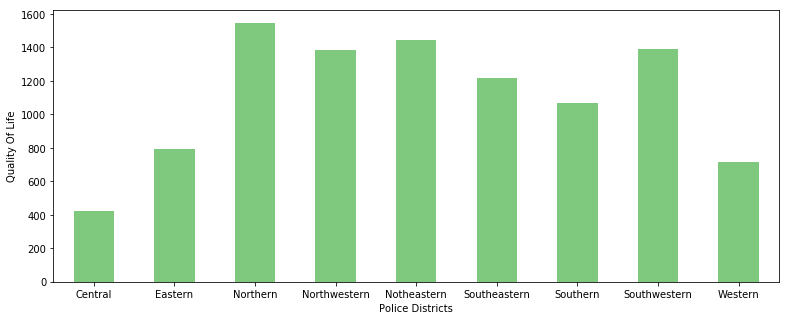

In [35]:
Qual_police = final[['PoliceDistrict','Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']]
Qual_police = Qual_police.groupby('PoliceDistrict').mean()
Qual_police_cpy = Qual_police.copy()
col_names2 = [ 'Taxper100',  "DirtyStreets'13", "CloggedDrains'13", 'Trees',
       'OpenSpace', 'WalkScore', 'CrimeRate', 'ViolentCrimeRate',
       'PropertyCrimeRate', 'JuvenileArrestRate', 'JuvenileViolentOffenses',
       'JuvenileDrugOffenses', '911Shootings', 'GunHomicides',
       '911CommonAssaults', '911Narcotics', '911AutoAccidents',
       'AdultArrestRate']
features2 = Qual_police[col_names2]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
Qual_police_cpy[col_names2]= features2
QoL_police = [1500] * 9
Qual_police_cpy = Qual_police_cpy.reset_index()
for j in range(len(QoL_police)):
    for i in range(len(negative_attributes)):
        QoL_police[j] = QoL_police[j] - Qual_police_cpy[negative_attributes[i]][j]
for j in range(len(QoL_police)):
    for i in range(len(positive_attributes)):
        QoL_police[j] = QoL_police[j] + Qual_police_cpy[positive_attributes[i]][j]
Qual_police_cpy['QualityOfLife'] = QoL_police
Qual_police_cpy = Qual_police_cpy.reset_index()
fig1 = Qual_police_cpy.plot.bar(x='PoliceDistrict', y='QualityOfLife', rot=0, legend=False, cmap='Accent', figsize=(13,5))
fig1.set_xlabel("Police Districts")
fig1.set_ylabel("Quality Of Life")

## Ranking Police Districts based on Quality Of Life %

In [36]:
rank_df2 = Qual_police_cpy[['PoliceDistrict', 'QualityOfLife']]
QoL_percent_police = Qual_police_cpy[['PoliceDistrict', 'QualityOfLife']]
QoL_percent_police = QoL_percent_police.groupby('PoliceDistrict').mean()
features2 = QoL_percent_police[['QualityOfLife']]
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaler2 = min_max_scaler.fit(features2)
features2=scaler2.transform(features2)
QoL_percent_police['QualityOfLife'] = features2
rank_df2['QoL %'] = QoL_percent_police['QualityOfLife'].tolist()
rank_df2 = rank_df2.sort_values('QualityOfLife', ascending=False)
rank_df2.index = range(1,10)
rank_df2

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PoliceDistrict,QualityOfLife,QoL %
1,Northern,1545.467779,100.000000
2,Notheastern,1443.425402,90.894956
3,Southwestern,1392.871049,86.384089
4,Northwestern,1382.888134,85.493333
5,Southeastern,1215.515507,70.558998
6,Southern,1065.403666,57.164809
7,Eastern,791.854703,32.756565
8,Western,714.743382,25.876072
9,Central,424.744128,0.000000
